In [14]:
import math
import sys

sys.path.append("..")

import torch
import transformers

from utils import add_attn_hooks

# tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
# model = transformers.AutoModelForMaskedLM.from_pretrained("/home/sipb/nlp-class-project/checkpoints/distilbert_base_ltr/epoch_3_checkpt", ignore_mismatched_sizes=True)

tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")
text_dir = "rtl"
# text_dir = "ltr"
model = transformers.AutoModelForMaskedLM.from_pretrained(f"/home/sipb/nlp-class-project/checkpoints/bert_base_{text_dir}/epoch_3_checkpt", ignore_mismatched_sizes=True)

Some weights of the model checkpoint at /home/sipb/nlp-class-project/checkpoints/bert_base_rtl/epoch_3_checkpt were not used when initializing BertForMaskedLM: ['attention_mask']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at /home/sipb/nlp-class-project/checkpoints/bert_base_rtl/epoch_3_checkpt and are newly initialized because the shapes did not match:
- bert.embeddings.position_embeddings.weight: found shape torch.Size([512, 768]) in the checkpoint and torch.Size([128, 768]) in the model inst

In [15]:
add_attn_hooks(model, text_dir)
model.eval();

In [16]:
with open("/home/sipb/nlp-class-project/data/riddles.txt", "r") as f:
    riddles = [line.rstrip() for line in f.readlines()]

In [17]:
# CPU is fast enough

ppls = []
for riddle in riddles:
    batch = tokenizer([riddle], return_tensors="pt", padding_side="left" if text_dir == "rtl" else "right", padding="max_length", max_length=128)
    batch["labels"] = batch["input_ids"].clone()
    batch["labels"][batch["attention_mask"] == 0] = -100
    # batch = tokenizer([riddle], return_tensors="pt")#, padding_side="left" if text_dir == "rtl" else "right", padding="longest", max_length=128)
    # batch["labels"] = batch["input_ids"]
    with torch.inference_mode():
        output = model(**batch)
        ppls.append(math.e ** output.loss.item())

In [18]:
sum(ppls) / len(ppls), text_dir

(522.113471240328, 'rtl')

In [13]:
sum(ppls) / len(ppls), text_dir

(1007.5656859988405, 'ltr')

In [11]:
sum(ppls) / len(ppls), text_dir

(1007.5656309474507, 'ltr')

In [21]:
sum(ppls) / len(ppls)

937.8557468023619

In [58]:
batch

{'input_ids': tensor([[  101,  1045,  2064,  2022,  2524,  1010,  2021,  1045,  2572,  2025,
          5024,  1012,  2054,  2572,  1045,  1029,  1037, 15117,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

(array([ 4.,  6., 11.,  6.,  5.,  2.,  1.,  1.,  2.,  2.]),
 array([ 613.56297843,  829.36555779, 1045.16813716, 1260.97071653,
        1476.77329589, 1692.57587526, 1908.37845463, 2124.18103399,
        2339.98361336, 2555.78619272, 2771.58877209]),
 <BarContainer object of 10 artists>)

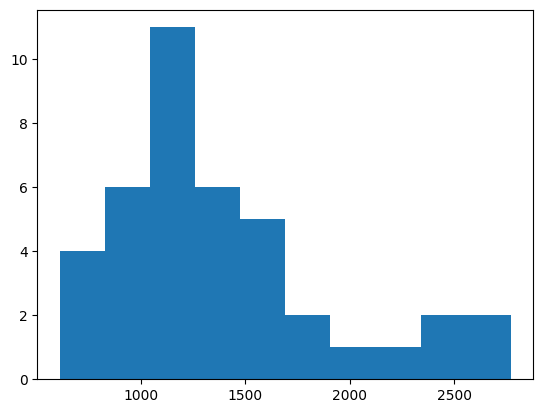

In [16]:
import matplotlib.pyplot as plt

plt.hist(ppls)

In [14]:
ppls

[956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414]